# Sales Data Analysis


#### Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


#### Import 12 months sales data and Merge Sales Data


In [15]:

all_months_data = pd.DataFrame()

files = [ file for file in os.listdir('./Sales_Data') ]

for file in files:
    data1 = pd.read_csv('./Sales_Data/' + file)
    all_months_data = pd.concat([all_months_data, data1])

all_months_data.to_csv('./Sales_data/all_months_data.csv',index=False)


#### Read all months data

In [89]:
all_data = pd.read_csv('./Sales_Data/all_months_data.csv')
all_data.shape

(186850, 6)

## Clean Data

#### Drop rows with null values

In [100]:
all_data = all_data.dropna(how='all', axis = 0)
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

##### Drop rows with 'Quantity Ordered' = 'Quantity Ordered'

In [ ]:
all_data.drop(all_data[all_data['Quantity Ordered'] == 'Quantity Ordered'].index, inplace=True)

In [71]:
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"


## Augument Data

#### Convert 'Order Date' column to Datetime

In [102]:
 all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], dayfirst=True, errors='coerce')

In [103]:
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

#### Replace Null values in 'Order Date' column with Max. of 'Order Date'

In [104]:
all_data['Order Date'].fillna(all_data['Order Date'].max(), inplace=True)

#### Convert columns to correct Tye

In [105]:
all_data.sort_values('Quantity Ordered', ascending = False)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
81010,226483,AAA Batteries (4-pack),9,2.99,2019-07-20 23:28:00,"867 Sunset St, San Francisco, CA 94016"
92877,211097,AAA Batteries (4-pack),9,2.99,2019-06-23 08:29:00,"338 Hickory St, Los Angeles, CA 90001"
81646,227096,AAA Batteries (4-pack),9,2.99,2019-07-29 09:50:00,"60 10th St, San Francisco, CA 94016"
149933,291034,AAA Batteries (4-pack),8,2.99,2019-09-11 16:30:00,"268 Willow St, Dallas, TX 75001"
156970,261442,AAA Batteries (4-pack),8,2.99,2019-10-16 20:31:00,"36 Center St, Boston, MA 02215"
19563,237807,AAA Batteries (4-pack),8,2.99,2019-08-13 11:11:00,"89 Church St, Portland, OR 97035"
79148,224719,AAA Batteries (4-pack),8,2.99,2019-07-26 23:59:00,"876 Adams St, San Francisco, CA 94016"
174926,278566,AAA Batteries (4-pack),8,2.99,2019-10-13 19:07:00,"992 Park St, Los Angeles, CA 90001"
69848,143416,AAA Batteries (4-pack),7,2.99,2019-01-24 19:58:00,"927 Jefferson St, New York City, NY 10001"
82995,228384,AAA Batteries (4-pack),7,2.99,2019-06-07 17:34:00,"78 Highland St, Austin, TX 73301"


In [106]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])

In [107]:
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

#### AddYear and Month columns 

In [108]:
all_data['Year'] =pd.DatetimeIndex(all_data['Order Date']).year


In [109]:
all_data['Month'] =pd.DatetimeIndex(all_data['Order Date']).month

In [110]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4
2,176559,Bose SoundSport Headphones,1,99.99,2019-07-04 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,7
3,176560,Google Phone,1,600.00,2019-12-04 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,12
4,176560,Wired Headphones,1,11.99,2019-12-04 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,12
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4


#### Add Sales column

In [111]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

In [112]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-07-04 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,7,99.99
3,176560,Google Phone,1,600.00,2019-12-04 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,12,600.00
4,176560,Wired Headphones,1,11.99,2019-12-04 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,12,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,11.99


#### Add City and State columns

In [154]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City']= all_data['Purchase Address'].apply(lambda x : f"{get_city(x)} ({get_state(x)})")

all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-07-04 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,7,99.99,Boston (MA)


#### Q1. What was the best month for Sales.  What was the sales for that month.

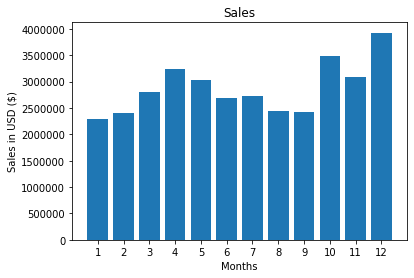

In [134]:
results = all_data.groupby('Month').sum()
month = range(1,13)

plt.bar(month, results['Sales'])
plt.title('Sales')
plt.xticks(month)
plt.xlabel('Months')
plt.ylabel('Sales in USD ($)')
plt.show()

#### Q2. What US City has highest sales

In [164]:
keys = [city for city, df in all_data.groupby(['City'])]



[' Atlanta (GA)',
 ' Austin (TX)',
 ' Boston (MA)',
 ' Dallas (TX)',
 ' Los Angeles (CA)',
 ' New York City (NY)',
 ' Portland (ME)',
 ' Portland (OR)',
 ' San Francisco (CA)',
 ' Seattle (WA)']

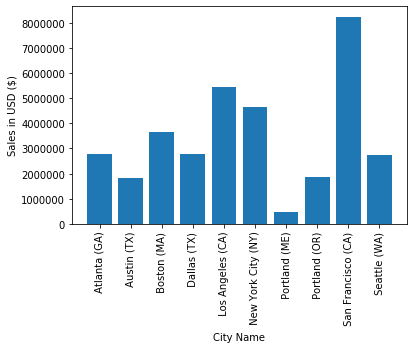

In [166]:
import matplotlib.pyplot as plt
keys = [city for city, df in all_data.groupby(['City'])]
results= all_data.groupby('City').sum()
plt.bar(keys , results['Sales'])
plt.xticks(keys, rotation='vertical')
plt.ylabel('Sales in USD ($)')
plt.xlabel('City Name')
plt.show()

#### Q3. What time should we display advertisements to maximize lilelihood of Customers buying products

In [169]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-07-04 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,7,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-12-04 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,12,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-12-04 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,12,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,11.99,Los Angeles (CA),9,27


In [174]:
hours = [hour for hour, df in all_data.groupby(['Hour'])]
hours

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

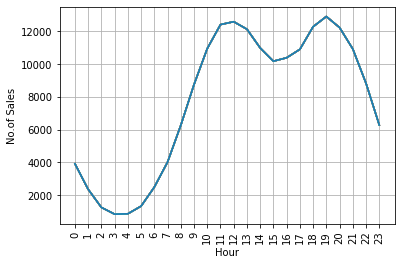

In [177]:
hours = [hour for hour, df in all_data.groupby(['Hour'])]
results= all_data.groupby('Hour').count()
plt.plot(hours , all_data.groupby(['Hour']).count())
plt.xticks(hours, rotation='vertical')
plt.ylabel('No.of Sales')
plt.xlabel('Hour')
plt.grid()
plt.show()

#### Q4. What products are most often sold toghether?

In [181]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

df['Grouped']= df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [183]:
from itertools import combinations
from collections import Counter

In [189]:
count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,3)))

In [190]:
print(count)

Counter({('Google Phone', 'USB-C Charging Cable', 'Wired Headphones'): 87, ('iPhone', 'Lightning Charging Cable', 'Wired Headphones'): 62, ('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones'): 47, ('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'): 35, ('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones'): 33, ('iPhone', 'Apple Airpods Headphones', 'Wired Headphones'): 27, ('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones'): 24, ('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'): 16, ('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones'): 5, ('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones'): 5, ('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones'): 4, ('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)'): 3, ('iPhone', 'Lightning Charging Cable', 'Lightning Charging Cable'): 3, ('iPhone', 'Lightning Charging Cable', 'AA Batteries (4

In [191]:
for key, value in count.most_common(10):
    print(key,value)

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5


#### Q5. What product sold the most? why do you think is sold the most?

In [192]:
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-07-04 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,7,99.99,Boston (MA),22,30


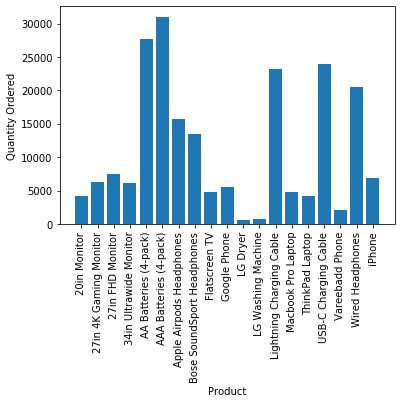

In [201]:
product_group = all_data.groupby('Product')

quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product,df in product_group]

plt.bar(products, quantity_ordered)
plt.xticks(products, rotation='vertical')
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.show()

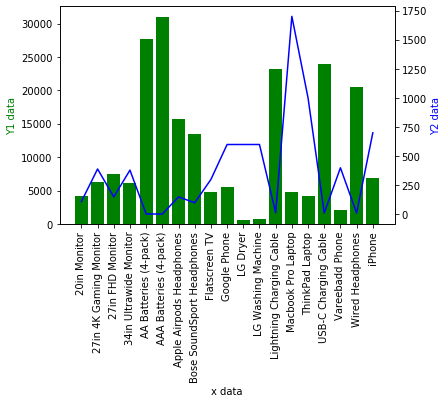

In [209]:
prices = all_data.groupby('Product').mean()['Price Each']

fit, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products,quantity_ordered, color = 'g')
ax2.plot(products,prices,'b-')

ax1.set_xlabel('x data')
ax1.set_ylabel('Y1 data', color = 'g')
ax2.set_ylabel('Y2 data',color = 'b')
ax1.set_xticklabels(products,rotation='vertical')

plt.show()
